In [1]:
import pandas as pd

# Load the cleaned CSV file
cleaned_reviews = "air_nz_cleaned_data.csv"
reviews_df = pd.read_csv(cleaned_reviews)

reviews_df

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,wifi_&_connectivity,value_for_money,recommended,inflight_entertainment,verified_status,review_content
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,5.0,4.0,5.0,True,-1.0,False,I was honestly quite surprised about Air New Z...
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,5.0,-1.0,1.0,False,-1.0,False,Air New Zealand domestic service is getting wo...
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,1.0,-1.0,1.0,False,-1.0,True,Air New Zealand bumped us off our flight on th...
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,2.0,1.0,1.0,2.0,False,2.0,False,"Very unfortunately the service, care, and qual..."
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,4.0,4.0,-1.0,5.0,True,-1.0,True,Check-in was efficient; boarding and departure...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2013-05-12,Air New Zealand customer review,3,NaN,NaN,Economy Class,NaN,NaN,3.0,2.0,3.0,-1.0,-1.0,2.0,False,4.0,False,I have flown with Air New Zealand for several ...
745,2013-05-10,Air New Zealand customer review,10,NaN,NaN,Premium Economy,NaN,NaN,5.0,5.0,5.0,-1.0,-1.0,4.0,True,5.0,False,Flew Wellington-San Francisco (via Auckland). ...
746,2013-05-08,Air New Zealand customer review,9,NaN,NaN,Premium Economy,NaN,NaN,4.0,5.0,5.0,-1.0,-1.0,5.0,True,5.0,False,Flew Premium Economy from LAX to AKL on a 777-...
747,2013-05-06,Air New Zealand customer review,5,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,-1.0,-1.0,3.0,False,1.0,False,Adelaide to Auckland April 28 2013. Usual incr...


In [2]:
reviews_df.columns

Index(['date', 'header', 'rating', 'aircraft', 'type_of_traveller',
       'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'ground_service',
       'wifi_&_connectivity', 'value_for_money', 'recommended',
       'inflight_entertainment', 'verified_status', 'review_content'],
      dtype='object')

# What are the average ratings for specific service categories (e.g., seat comfort, cabin staff service, food & beverages, etc.)?

In [3]:
# List of rating columns
rating_columns = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'ground_service','wifi_&_connectivity','value_for_money','inflight_entertainment']

# Calculate average rating for each category
average_ratings_by_category = reviews_df[rating_columns].mean()
print("Average Ratings by Category:")
print(average_ratings_by_category)


Average Ratings by Category:
seat_comfort              2.941255
cabin_staff_service       3.174900
food_&_beverages          2.461949
ground_service            1.743658
wifi_&_connectivity      -0.194927
value_for_money           2.859813
inflight_entertainment    2.341789
dtype: float64


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_86540/1329301149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=average_ratings_by_category.index, y=average_ratings_by_category.values, palette="viridis")


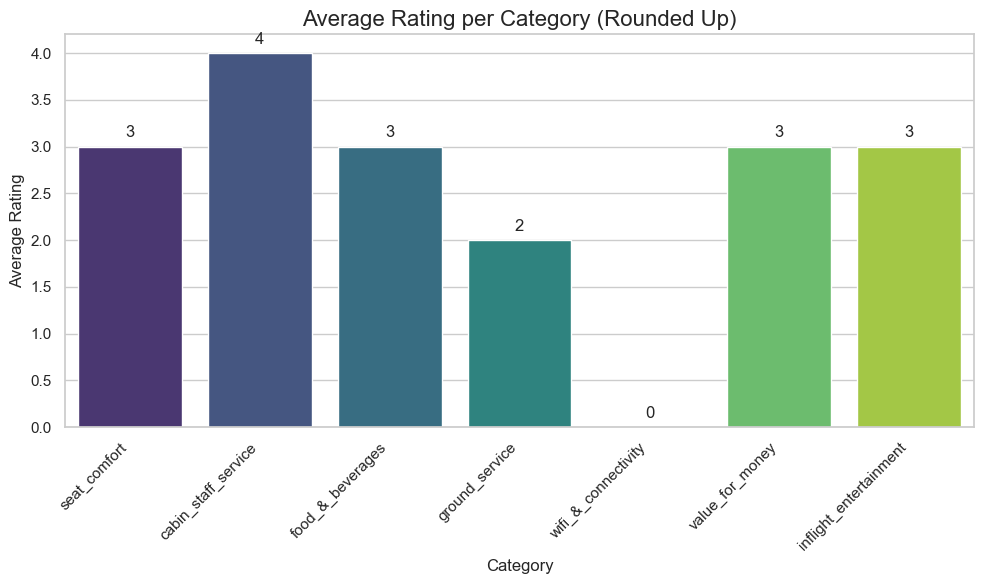

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average rating for each category and round up to a whole number
average_ratings_by_category = np.ceil(reviews_df[rating_columns].mean())

# Set the style of the plot for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=average_ratings_by_category.index, y=average_ratings_by_category.values, palette="viridis")

# Add labels and title
plt.title("Average Rating per Category (Rounded Up)", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for i in range(len(average_ratings_by_category)):
    bar_plot.text(i, average_ratings_by_category.values[i] + 0.1, str(int(average_ratings_by_category.values[i])), 
                  ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


# What is the average overall rating of Air New Zealand based on customer reviews?

In [5]:
# Convert ratings to numeric if they are in string format
reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')

# Calculate the average rating
average_rating = reviews_df['rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

Average Rating: 5.25


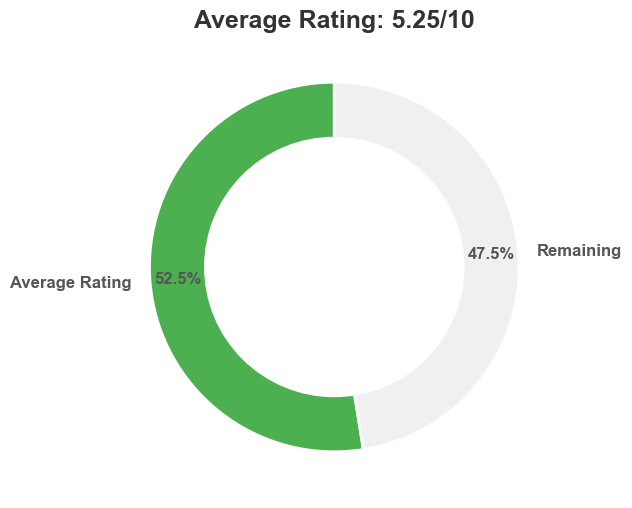

In [6]:
# Data for the donut chart
labels = ['Average Rating', 'Remaining']
sizes = [average_rating, 10 - average_rating]
colors = ['#4caf50', '#f0f0f0']  

# Plot a donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%',
       pctdistance=0.85, wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Add a circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', linewidth=1.25)
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title(f'Average Rating: {average_rating:.2f}/10', fontsize=18, color='#333', fontweight='bold')

# Customize the font of labels
plt.setp(ax.texts, fontweight='bold', color='#555', fontsize=12)

# Display the chart
plt.show()


# How do missing WiFi & Connectivity Ratings affect the overall average rating?

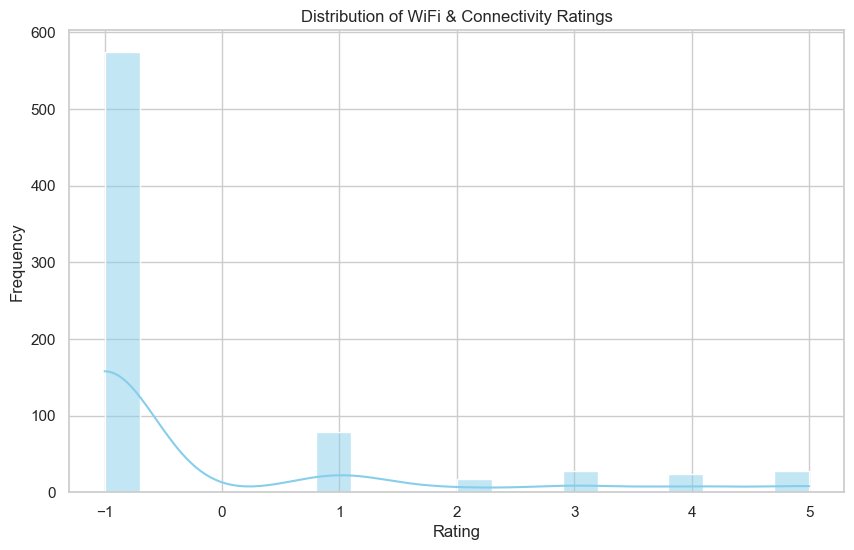

In [7]:
# Plot distribution of 'wifi_&_connectivity' ratings
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['wifi_&_connectivity'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of WiFi & Connectivity Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [8]:
# Count of -1.0 values in 'wifi_&_connectivity'
negative_count = (reviews_df['wifi_&_connectivity'] == -1.0).sum()
total_count = len(reviews_df)
print(f"Number of -1.0 ratings: {negative_count}")
print(f"Total number of ratings: {total_count}")


Number of -1.0 ratings: 574
Total number of ratings: 749


In [9]:
# Filter out -1.0 values and calculate the mean
valid_wifi_ratings = reviews_df[reviews_df['wifi_&_connectivity'] != -1.0]['wifi_&_connectivity']
average_valid_wifi_rating = valid_wifi_ratings.mean()

print(f"Average WiFi & Connectivity Rating (excluding -1.0): {average_valid_wifi_rating}")


Average WiFi & Connectivity Rating (excluding -1.0): 2.4457142857142857


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_86540/2565849431.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings_comparison.index, y=average_ratings_comparison.values, palette="viridis")


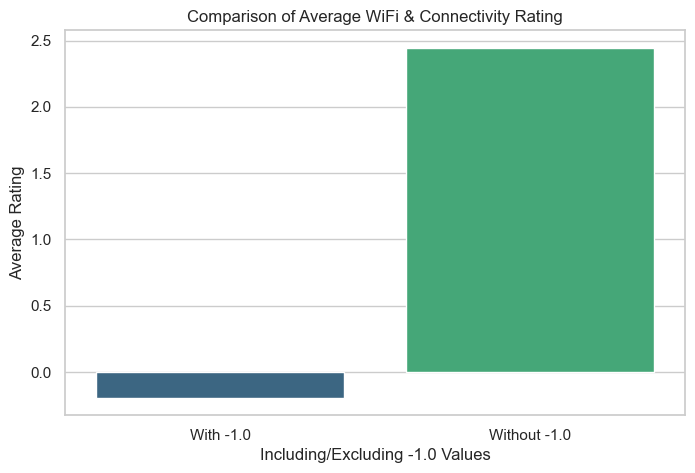

In [10]:
# Data for comparison
average_ratings_comparison = pd.Series({
    'With -1.0': reviews_df['wifi_&_connectivity'].mean(),
    'Without -1.0': average_valid_wifi_rating
})

# Plot the comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=average_ratings_comparison.index, y=average_ratings_comparison.values, palette="viridis")
plt.title("Comparison of Average WiFi & Connectivity Rating")
plt.xlabel("Including/Excluding -1.0 Values")
plt.ylabel("Average Rating")
plt.show()


# What is the overall sentiment distribution of the reviews?

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [12]:
import nltk
nltk.data.path.append('/Users/ainna/nltk_data/tokenizers')
nltk.data.find('tokenizers/punkt')


FileSystemPathPointer('/Users/ainna/nltk_data/tokenizers/punkt')

In [13]:
# Load dataset
reviews_df = pd.read_csv('air_nz_cleaned_data.csv')
reviews_df

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,wifi_&_connectivity,value_for_money,recommended,inflight_entertainment,verified_status,review_content
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,5.0,4.0,5.0,True,-1.0,False,I was honestly quite surprised about Air New Z...
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,5.0,-1.0,1.0,False,-1.0,False,Air New Zealand domestic service is getting wo...
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,1.0,-1.0,1.0,False,-1.0,True,Air New Zealand bumped us off our flight on th...
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,2.0,1.0,1.0,2.0,False,2.0,False,"Very unfortunately the service, care, and qual..."
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,4.0,4.0,-1.0,5.0,True,-1.0,True,Check-in was efficient; boarding and departure...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2013-05-12,Air New Zealand customer review,3,NaN,NaN,Economy Class,NaN,NaN,3.0,2.0,3.0,-1.0,-1.0,2.0,False,4.0,False,I have flown with Air New Zealand for several ...
745,2013-05-10,Air New Zealand customer review,10,NaN,NaN,Premium Economy,NaN,NaN,5.0,5.0,5.0,-1.0,-1.0,4.0,True,5.0,False,Flew Wellington-San Francisco (via Auckland). ...
746,2013-05-08,Air New Zealand customer review,9,NaN,NaN,Premium Economy,NaN,NaN,4.0,5.0,5.0,-1.0,-1.0,5.0,True,5.0,False,Flew Premium Economy from LAX to AKL on a 777-...
747,2013-05-06,Air New Zealand customer review,5,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,-1.0,-1.0,3.0,False,1.0,False,Adelaide to Auckland April 28 2013. Usual incr...


In [14]:
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify as Positive, Neutral, or Negative
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [15]:
reviews_df['sentiment'] = reviews_df['review_content'].apply(get_sentiment)
reviews_df

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,wifi_&_connectivity,value_for_money,recommended,inflight_entertainment,verified_status,review_content,sentiment
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,5.0,4.0,5.0,True,-1.0,False,I was honestly quite surprised about Air New Z...,Positive
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,5.0,-1.0,1.0,False,-1.0,False,Air New Zealand domestic service is getting wo...,Negative
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,1.0,-1.0,1.0,False,-1.0,True,Air New Zealand bumped us off our flight on th...,Negative
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,2.0,1.0,1.0,2.0,False,2.0,False,"Very unfortunately the service, care, and qual...",Negative
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,4.0,4.0,-1.0,5.0,True,-1.0,True,Check-in was efficient; boarding and departure...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2013-05-12,Air New Zealand customer review,3,NaN,NaN,Economy Class,NaN,NaN,3.0,2.0,3.0,-1.0,-1.0,2.0,False,4.0,False,I have flown with Air New Zealand for several ...,Positive
745,2013-05-10,Air New Zealand customer review,10,NaN,NaN,Premium Economy,NaN,NaN,5.0,5.0,5.0,-1.0,-1.0,4.0,True,5.0,False,Flew Wellington-San Francisco (via Auckland). ...,Positive
746,2013-05-08,Air New Zealand customer review,9,NaN,NaN,Premium Economy,NaN,NaN,4.0,5.0,5.0,-1.0,-1.0,5.0,True,5.0,False,Flew Premium Economy from LAX to AKL on a 777-...,Positive
747,2013-05-06,Air New Zealand customer review,5,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,-1.0,-1.0,3.0,False,1.0,False,Adelaide to Auckland April 28 2013. Usual incr...,Positive


In [16]:
# Calculate sentiment counts
sentiment_counts = reviews_df['sentiment'].value_counts()

# Print total number of reviews per sentiment
print("Total number of reviews per sentiment:")
print(sentiment_counts)

Total number of reviews per sentiment:
sentiment
Positive    542
Negative    204
Neutral       3
Name: count, dtype: int64


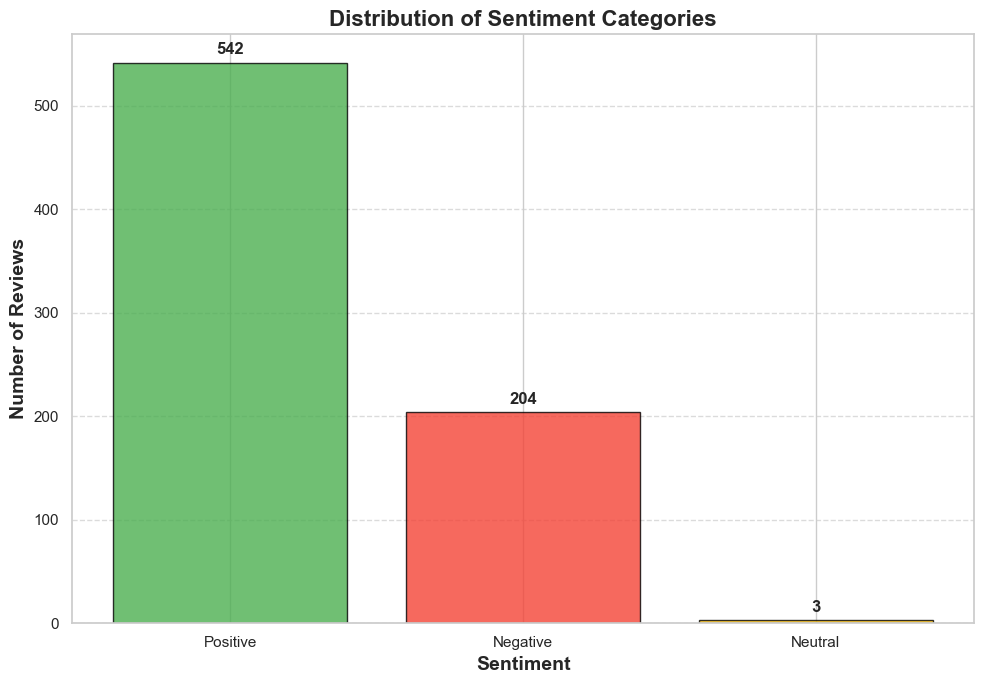

In [17]:
plt.figure(figsize=(10, 7))
colors = ['#4CAF50', '#F44336', '#FFC107']  # Green for Positive,  Red for Negative, Yellow for Neutral

plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors, edgecolor='black', alpha=0.8)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add titles and labels
plt.xlabel('Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold')
plt.title('Distribution of Sentiment Categories', fontsize=16, fontweight='bold')

# Add value labels on top of bars
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Do customer reviews improve over time?

In [18]:
# Convert 'date' to datetime and extract the year
reviews_df['year'] = pd.to_datetime(reviews_df['date'], format='%Y-%m-%d').dt.year

# Aggregate the number of reviews by year and sentiment
sentiment_by_year = reviews_df.groupby(['year', 'sentiment']).size().unstack(fill_value=0)


sentiment_by_year


sentiment,Negative,Neutral,Positive
year,,,
2013,8,0,68
2014,16,1,69
2015,8,0,61
2016,12,0,62
2017,15,0,55
2018,26,0,52
2019,34,0,47
2020,16,0,29
2021,12,1,12


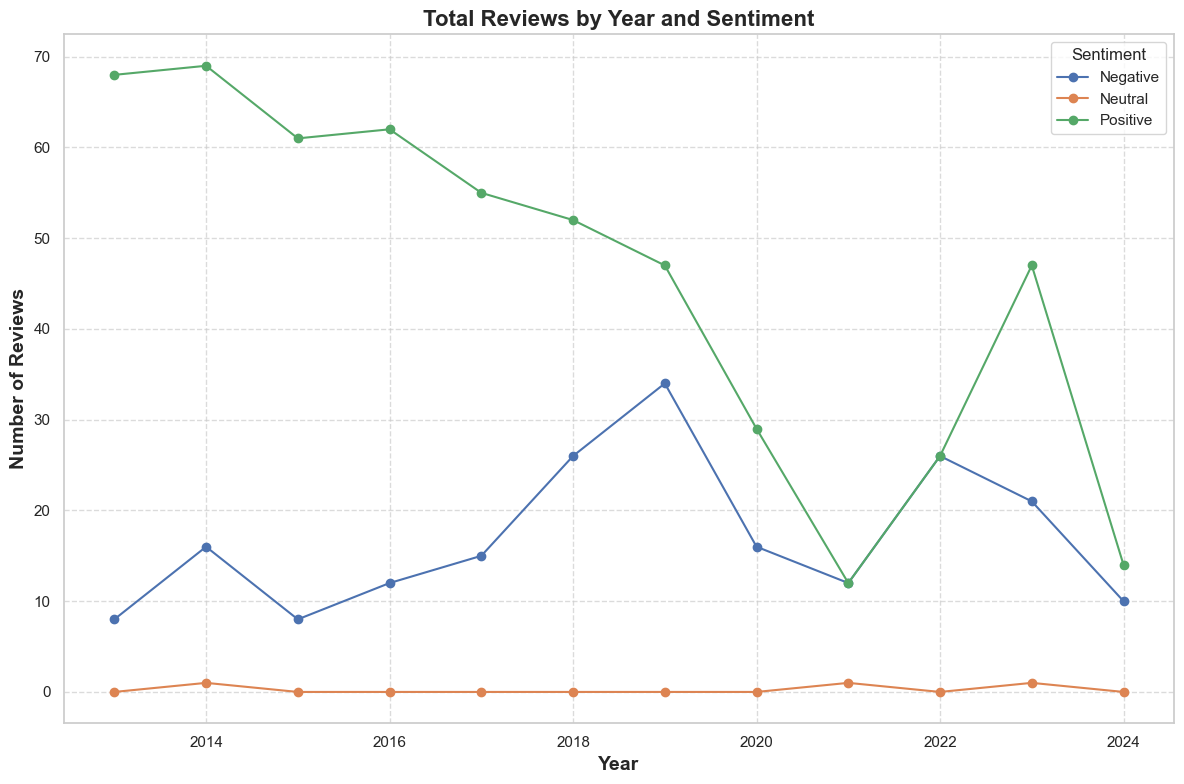

In [19]:
# Plot line graph
plt.figure(figsize=(12, 8))

for sentiment in sentiment_by_year.columns:
    plt.plot(sentiment_by_year.index, sentiment_by_year[sentiment], marker='o', label=sentiment)

# Add titles and labels
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold')
plt.title('Total Reviews by Year and Sentiment', fontsize=16, fontweight='bold')
plt.legend(title='Sentiment')
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

# What key themes emerge from Air New Zealand's customer reviews across different sentiments?

In [20]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [21]:
# Load the airplane mask image
mask = np.array(Image.open('/Users/ainna/Documents/Coding Crusade with Ainna/air-new-zealand-customer-feedback-analysis/airplane-vector-36294843 copy.jpg'))

In [22]:
# Function to generate and plot word cloud
def generate_wordcloud(text, title, mask):
    wordcloud = WordCloud(background_color='white', mask=mask, contour_width=0, mode='RGBA').generate(text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()

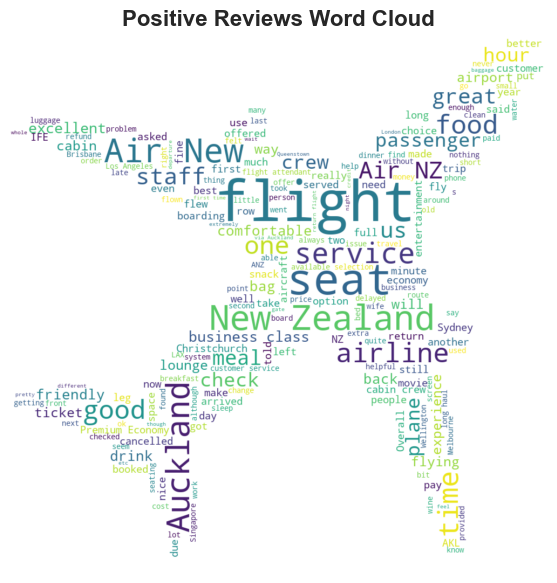

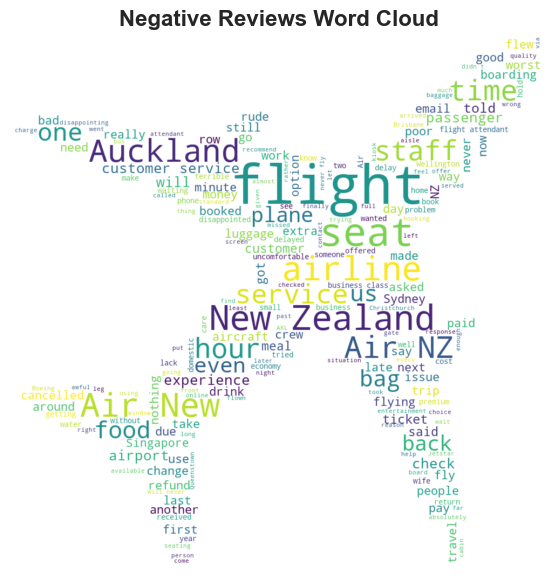

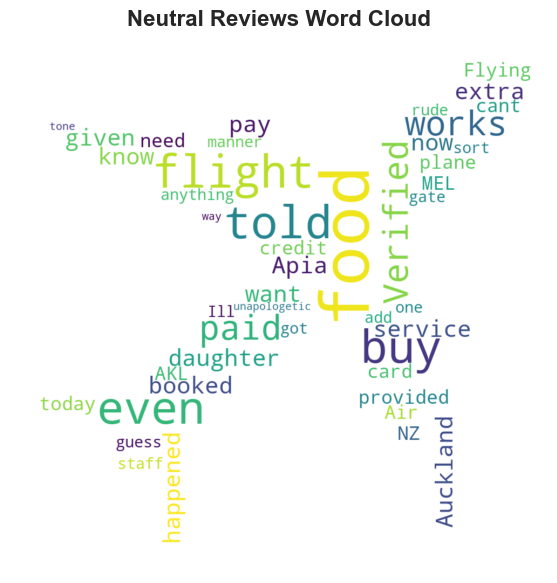

In [23]:
# Extract text based on sentiment
positive_reviews = " ".join(review for review in reviews_df[reviews_df['sentiment'] == 'Positive']['review_content'])
negative_reviews = " ".join(review for review in reviews_df[reviews_df['sentiment'] == 'Negative']['review_content'])
neutral_reviews = " ".join(review for review in reviews_df[reviews_df['sentiment'] == 'Neutral']['review_content'])

# Generate word clouds for each sentiment category
generate_wordcloud(positive_reviews, 'Positive Reviews Word Cloud', mask)
generate_wordcloud(negative_reviews, 'Negative Reviews Word Cloud', mask)
generate_wordcloud(neutral_reviews, 'Neutral Reviews Word Cloud', mask)

In [24]:
reviews_df.to_csv("reviews_with_sentiments.csv", index=False)


# Which type of traveler gives the highest/lowest ratings?

In [25]:
# Group by 'type_of_traveller' and calculate the average rating for each group
traveler_ratings = reviews_df.groupby('type_of_traveller')['rating'].mean().sort_values()

# Print the average ratings for each traveler type
print("Average Rating by Type of Traveler:")
print(traveler_ratings)

Average Rating by Type of Traveler:
type_of_traveller
Family Leisure    4.212766
Business          4.630952
Couple Leisure    4.859459
Solo Leisure      5.035000
Name: rating, dtype: float64


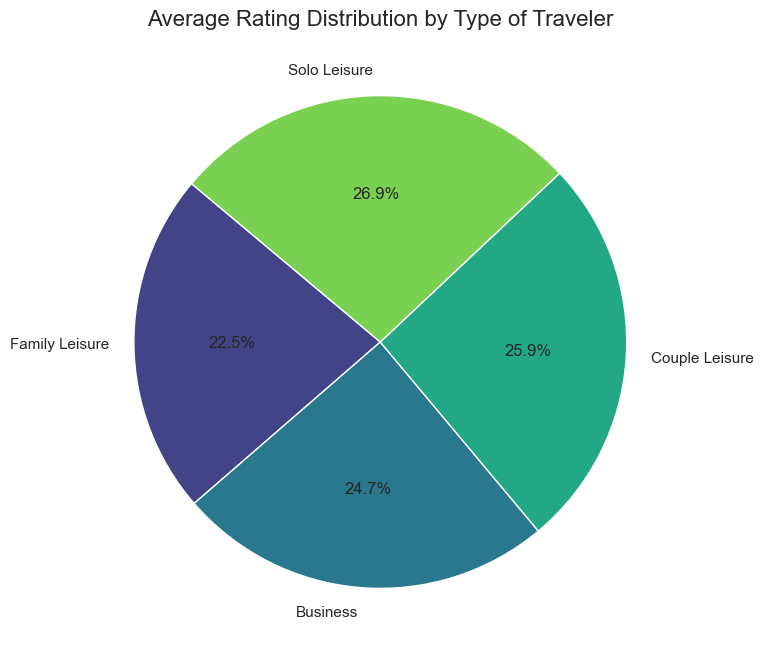

In [26]:
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(traveler_ratings, labels=traveler_ratings.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(traveler_ratings)))

# Add title
plt.title("Average Rating Distribution by Type of Traveler", fontsize=16)

# Show the plot
plt.show()

In [27]:
# Group by 'type_of_traveller' and calculate the sentiment counts
sentiment_by_traveler = reviews_df.groupby(['type_of_traveller', 'sentiment']).size().unstack(fill_value=0)

# Print sentiment distribution for each traveler type
print("Sentiment Distribution by Type of Traveler:")
print(sentiment_by_traveler)

Sentiment Distribution by Type of Traveler:
sentiment          Negative  Neutral  Positive
type_of_traveller                             
Business                 22        0        62
Couple Leisure           54        0       131
Family Leisure           39        0        55
Solo Leisure             61        2       137


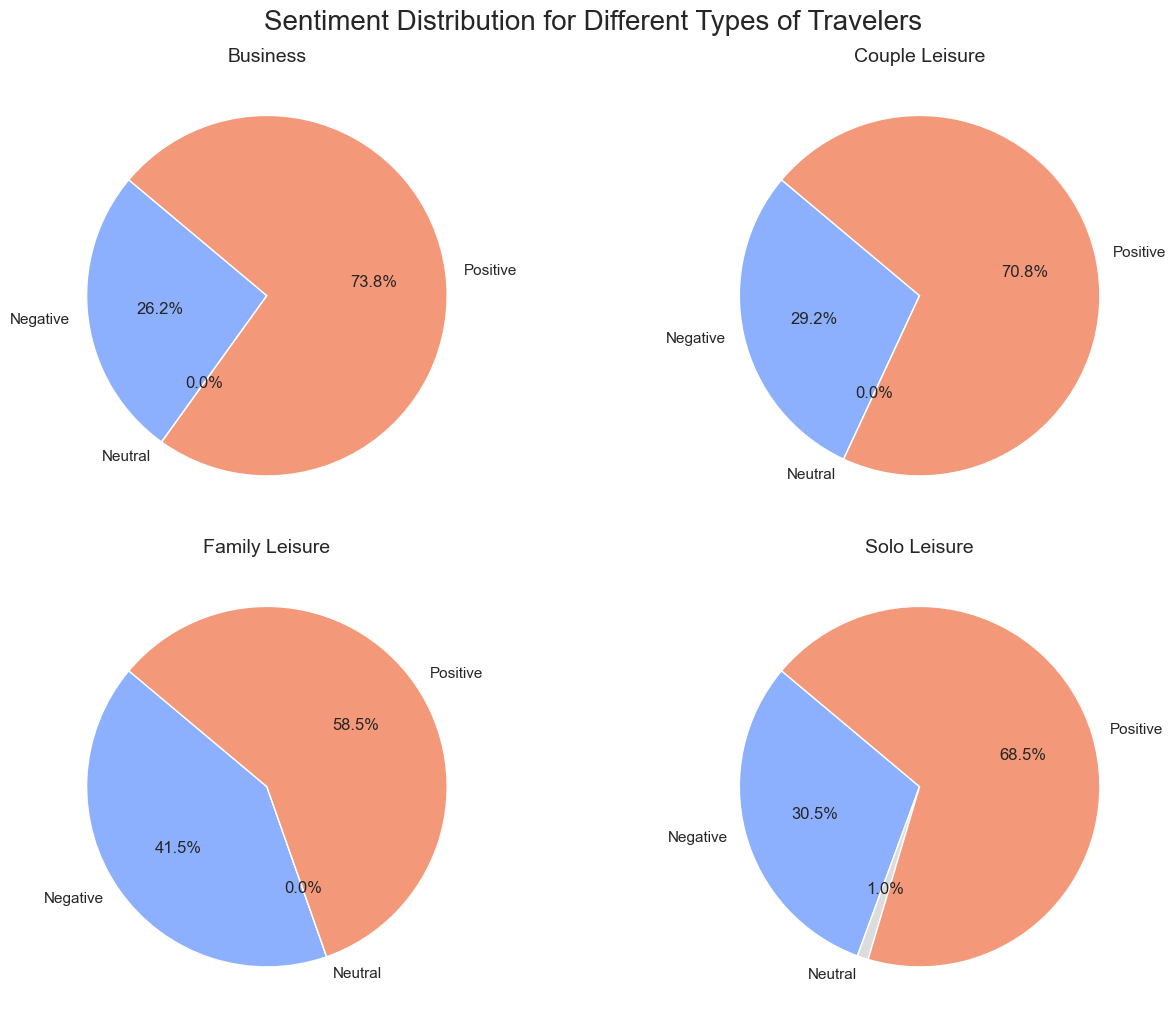

In [28]:
import seaborn as sns

# Group by 'type_of_traveller' and 'sentiment' and calculate the count of each sentiment
sentiment_by_traveler = reviews_df.groupby(['type_of_traveller', 'sentiment']).size().unstack(fill_value=0)

# Set the number of subplots based on the number of traveler types
num_traveler_types = len(sentiment_by_traveler.index)

# Define the layout for subplots (2 columns and enough rows to fit all traveler types)
cols = 2
rows = (num_traveler_types // cols) + (num_traveler_types % cols > 0) 
# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5)) 

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Define colors for the sentiments
colors = sns.color_palette("coolwarm", len(sentiment_by_traveler.columns))

# Loop through each traveler type to create a pie chart
for i, traveler_type in enumerate(sentiment_by_traveler.index):
    # Data for this traveler type
    sentiment_counts = sentiment_by_traveler.loc[traveler_type]
    
    # Plot pie chart on the corresponding subplot
    axes[i].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    
    # Add title to each subplot
    axes[i].set_title(f"{traveler_type}", fontsize=14)

# Remove any unused subplots if the total number of traveler types is less than rows * cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Add a super title for the entire figure
plt.suptitle("Sentiment Distribution for Different Types of Travelers", fontsize=20, y=1.02)

# Show the plot
plt.show()


# How do ratings vary by Seat Type (e.g. Economy, Business)?

In [29]:
import plotly.graph_objects as go

# List of rating columns excluding 'wifi_&_connectivity'
rating_columns = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'ground_service', 'value_for_money', 'inflight_entertainment']

# Group data by seat type and calculate the average rating for each category
ratings_by_seat_type = reviews_df.groupby('seat_type')[rating_columns].mean()

# Round the ratings to 2 decimal places
ratings_by_seat_type = ratings_by_seat_type.round(2)

# Create a Plotly figure
fig = go.Figure()

# Add a bar trace for each rating category
for category in rating_columns:
    fig.add_trace(
        go.Bar(
            x=ratings_by_seat_type.index,
            y=ratings_by_seat_type[category],
            name=category,
            textposition='auto'
        )
    )

# Update layout for better aesthetics
fig.update_layout(
    title='Average Ratings by Seat Type',
    xaxis_title='Seat Type',
    yaxis_title='Average Rating',
    barmode='group'
)

# Show the interactive plot
fig.show()

# How do domestic & international routes compare in terms of review ratings?

In [30]:
# Load the cleaned reviews dataset
cleaned_reviews = "air_nz_cleaned_data.csv"
reviews_df = pd.read_csv(cleaned_reviews)

# Display the first few rows of the data to understand the structure
reviews_df.head()


,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,wifi_&_connectivity,value_for_money,recommended,inflight_entertainment,verified_status,review_content
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,5.0,4.0,5.0,True,-1.0,False,I was honestly quite surprised about Air New Z...
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,5.0,-1.0,1.0,False,-1.0,False,Air New Zealand domestic service is getting wo...
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,1.0,-1.0,1.0,False,-1.0,True,Air New Zealand bumped us off our flight on th...
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,2.0,1.0,1.0,2.0,False,2.0,False,"Very unfortunately the service, care, and qual..."
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,4.0,4.0,-1.0,5.0,True,-1.0,True,Check-in was efficient; boarding and departure...


In [31]:
# Function to split the route into departure, arrival, and via (if applicable)
def split_route(route):
    # Check if the route is not NaN (missing value)
    if pd.isna(route):
        return pd.Series([None, None, None])
    
    # Split by "to" first
    if 'to' in route:
        departure, arrival_part = route.split(' to ', 1)
        
        # Check if "via" is present in the arrival part
        if 'via' in arrival_part:
            arrival, via = arrival_part.split(' via ', 1)
            return pd.Series([departure.strip(), arrival.strip(), via.strip()])
        else:
            return pd.Series([departure.strip(), arrival_part.strip(), None])
    else:
        return pd.Series([None, None, None])

# Apply the function to the 'route' column
reviews_df[['departure', 'arrival', 'via']] = reviews_df['route'].apply(split_route)

# Display the updated DataFrame to check the new columns
reviews_df[['route', 'departure', 'arrival', 'via']].head()

,route,departure,arrival,via
0,Auckland to Queenstown,Auckland,Queenstown,None
1,Auckland to Napier,Auckland,Napier,None
2,Napier to Auckland,Napier,Auckland,None
3,San Francisco to Queenstown via Auckland,San Francisco,Queenstown,Auckland
4,Auckland to Hobart,Auckland,Hobart,None


In [32]:
# Load the New Zealand airports dataset
nz_airports = "nz_airports.csv"
nz_airports_df = pd.read_csv(nz_airports)

nz_airports_df.columns

Index(['Airport_ID', 'Ident', 'Type', 'Airport_Name', 'Latitude', 'Longitude',
       'Elevation_Ft', 'Continent', 'ISO_Country', 'ISO_Region',
       'Municipality', 'Scheduled_Service', 'GPS_Code', 'IATA', 'Local_Code',
       'Home_Link', 'Wikipedia_Link', 'Keywords'],
      dtype='object')

In [33]:
# Convert municipality, departure, and arrival to lowercase for consistency
nz_airports_df['Municipality'] = nz_airports_df['Municipality'].str.lower()
reviews_df['departure'] = reviews_df['departure'].str.lower()
reviews_df['arrival'] = reviews_df['arrival'].str.lower()

# Display the first few rows to verify the changes
nz_airports_df[['Municipality', 'ISO_Country']].head()


,Municipality,ISO_Country
0,auckland,NZ
1,taupo,NZ
2,christchurch,NZ
3,te one,NZ
4,dunedin,NZ


In [34]:
# Merge only departure first to test the merging process
reviews_with_departure_country = reviews_df.merge(nz_airports_df[['Municipality', 'ISO_Country']], 
                                                  left_on='departure', 
                                                  right_on='Municipality', 
                                                  how='left')

# Rename the iso_country column to departure_country
reviews_with_departure_country = reviews_with_departure_country.rename(columns={'ISO_Country': 'departure_country'})

# Display a sample to verify
reviews_with_departure_country


,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,value_for_money,recommended,inflight_entertainment,verified_status,review_content,departure,arrival,via,Municipality,departure_country
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,5.0,True,-1.0,False,I was honestly quite surprised about Air New Z...,auckland,queenstown,None,auckland,NZ
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,1.0,False,-1.0,False,Air New Zealand domestic service is getting wo...,auckland,napier,None,auckland,NZ
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,1.0,False,-1.0,True,Air New Zealand bumped us off our flight on th...,napier,auckland,None,napier,NZ
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,2.0,False,2.0,False,"Very unfortunately the service, care, and qual...",san francisco,queenstown,Auckland,NaN,NaN
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,5.0,True,-1.0,True,Check-in was efficient; boarding and departure...,auckland,hobart,None,auckland,NZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,2013-05-06,Air New Zealand customer review,5,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,...,3.0,False,1.0,False,Adelaide to Auckland April 28 2013. Usual incr...,None,None,None,NaN,NZ
1312,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,2.0,False,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,NZ
1313,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,2.0,False,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,NZ
1314,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,2.0,False,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,NZ


In [35]:
# Now merge arrival country
reviews_with_full_country = reviews_with_departure_country.merge(nz_airports_df[['Municipality', 'ISO_Country']], 
                                                                 left_on='arrival', 
                                                                 right_on='Municipality', 
                                                                 how='left')

# Rename the iso_country column to arrival_country
reviews_with_full_country = reviews_with_full_country.rename(columns={'ISO_Country': 'arrival_country'})

# Display the first few rows to verify the merge
print(reviews_with_full_country[['arrival', 'arrival_country']].head())


      arrival arrival_country
0  queenstown              NZ
1      napier              NZ
2    auckland              NZ
3  queenstown              NZ
4      hobart             NaN


In [36]:
# Handle cases where departure or arrival is None/NaN
reviews_with_full_country['departure_country'] = reviews_with_full_country.apply(
    lambda row: row['departure_country'] if pd.notna(row['departure']) else None, axis=1
)
reviews_with_full_country['arrival_country'] = reviews_with_full_country.apply(
    lambda row: row['arrival_country'] if pd.notna(row['arrival']) else None, axis=1
)

# Display the updated DataFrame to check the final output
reviews_with_full_country

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,inflight_entertainment,verified_status,review_content,departure,arrival,via,Municipality_x,departure_country,Municipality_y,arrival_country
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,-1.0,False,I was honestly quite surprised about Air New Z...,auckland,queenstown,None,auckland,NZ,queenstown,NZ
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,-1.0,False,Air New Zealand domestic service is getting wo...,auckland,napier,None,auckland,NZ,napier,NZ
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,-1.0,True,Air New Zealand bumped us off our flight on th...,napier,auckland,None,napier,NZ,auckland,NZ
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,2.0,False,"Very unfortunately the service, care, and qual...",san francisco,queenstown,Auckland,NaN,NaN,queenstown,NZ
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,-1.0,True,Check-in was efficient; boarding and departure...,auckland,hobart,None,auckland,NZ,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None
3580,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None
3581,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None
3582,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None


In [37]:
duplicate_reviews = reviews_df[reviews_df.duplicated(subset=['review_content'], keep=False)]
print(duplicate_reviews)


Empty DataFrame
Columns: [date, header, rating, aircraft, type_of_traveller, seat_type, route, date_flown, seat_comfort, cabin_staff_service, food_&_beverages, ground_service, wifi_&_connectivity, value_for_money, recommended, inflight_entertainment, verified_status, review_content, departure, arrival, via]
Index: []

[0 rows x 21 columns]


In [38]:
reviews_df = reviews_df.drop_duplicates(subset=['review_content']) 

reviews_df

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,ground_service,wifi_&_connectivity,value_for_money,recommended,inflight_entertainment,verified_status,review_content,departure,arrival,via
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,5.0,4.0,5.0,True,-1.0,False,I was honestly quite surprised about Air New Z...,auckland,queenstown,None
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,5.0,-1.0,1.0,False,-1.0,False,Air New Zealand domestic service is getting wo...,auckland,napier,None
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,1.0,-1.0,1.0,False,-1.0,True,Air New Zealand bumped us off our flight on th...,napier,auckland,None
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,1.0,1.0,2.0,False,2.0,False,"Very unfortunately the service, care, and qual...",san francisco,queenstown,Auckland
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,4.0,-1.0,5.0,True,-1.0,True,Check-in was efficient; boarding and departure...,auckland,hobart,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2013-05-12,Air New Zealand customer review,3,NaN,NaN,Economy Class,NaN,NaN,3.0,2.0,...,-1.0,-1.0,2.0,False,4.0,False,I have flown with Air New Zealand for several ...,None,None,None
745,2013-05-10,Air New Zealand customer review,10,NaN,NaN,Premium Economy,NaN,NaN,5.0,5.0,...,-1.0,-1.0,4.0,True,5.0,False,Flew Wellington-San Francisco (via Auckland). ...,None,None,None
746,2013-05-08,Air New Zealand customer review,9,NaN,NaN,Premium Economy,NaN,NaN,4.0,5.0,...,-1.0,-1.0,5.0,True,5.0,False,Flew Premium Economy from LAX to AKL on a 777-...,None,None,None
747,2013-05-06,Air New Zealand customer review,5,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,...,-1.0,-1.0,3.0,False,1.0,False,Adelaide to Auckland April 28 2013. Usual incr...,None,None,None


In [39]:
# Load the airports dataset
airports = "airports.csv"
airports_df = pd.read_csv(airports)

# Convert municipality to lowercase for consistency
airports_df['municipality'] = airports_df['municipality'].str.lower()

# Print column names to check
print("Airports DataFrame columns:", airports_df.columns)
print("Reviews DataFrame columns:", reviews_with_full_country.columns)

Airports DataFrame columns: Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'gps_code', 'iata_code',
       'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')
Reviews DataFrame columns: Index(['date', 'header', 'rating', 'aircraft', 'type_of_traveller',
       'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'ground_service',
       'wifi_&_connectivity', 'value_for_money', 'recommended',
       'inflight_entertainment', 'verified_status', 'review_content',
       'departure', 'arrival', 'via', 'Municipality_x', 'departure_country',
       'Municipality_y', 'arrival_country'],
      dtype='object')


In [40]:
# Fill NaN values for departure_country
# Find rows where departure_country is NaN
nan_departure_country = reviews_with_full_country[reviews_with_full_country['departure_country'].isna()]

# Get municipalities from these rows
nan_departure_municipalities = nan_departure_country['departure'].unique()

# Find corresponding iso_country from airports_df
nan_departure_countries = airports_df[airports_df['municipality'].isin(nan_departure_municipalities)]

# Create a mapping of municipality to iso_country
municipality_to_country = dict(zip(nan_departure_countries['municipality'], nan_departure_countries['iso_country']))

# Update departure_country
reviews_with_full_country['departure_country'] = reviews_with_full_country['departure'].map(municipality_to_country).fillna(reviews_with_full_country['departure_country'])
reviews_with_full_country

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,inflight_entertainment,verified_status,review_content,departure,arrival,via,Municipality_x,departure_country,Municipality_y,arrival_country
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,-1.0,False,I was honestly quite surprised about Air New Z...,auckland,queenstown,None,auckland,NZ,queenstown,NZ
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,-1.0,False,Air New Zealand domestic service is getting wo...,auckland,napier,None,auckland,NZ,napier,NZ
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,-1.0,True,Air New Zealand bumped us off our flight on th...,napier,auckland,None,napier,NZ,auckland,NZ
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,2.0,False,"Very unfortunately the service, care, and qual...",san francisco,queenstown,Auckland,NaN,US,queenstown,NZ
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,-1.0,True,Check-in was efficient; boarding and departure...,auckland,hobart,None,auckland,NZ,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None
3580,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None
3581,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None
3582,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None


In [41]:
# Fill NaN values for arrival_country
# Find rows where arrival_country is NaN
nan_arrival_country = reviews_with_full_country[reviews_with_full_country['arrival_country'].isna()]

# Get municipalities from these rows
nan_arrival_municipalities = nan_arrival_country['arrival'].unique()

# Find corresponding iso_country from airports_df
nan_arrival_countries = airports_df[airports_df['municipality'].isin(nan_arrival_municipalities)]

# Create a mapping of municipality to iso_country
municipality_to_country = dict(zip(nan_arrival_countries['municipality'], nan_arrival_countries['iso_country']))

# Update arrival_country
reviews_with_full_country['arrival_country'] = reviews_with_full_country['arrival'].map(municipality_to_country).fillna(reviews_with_full_country['arrival_country'])
reviews_with_full_country

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,inflight_entertainment,verified_status,review_content,departure,arrival,via,Municipality_x,departure_country,Municipality_y,arrival_country
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,-1.0,False,I was honestly quite surprised about Air New Z...,auckland,queenstown,None,auckland,NZ,queenstown,NZ
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,-1.0,False,Air New Zealand domestic service is getting wo...,auckland,napier,None,auckland,NZ,napier,NZ
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,-1.0,True,Air New Zealand bumped us off our flight on th...,napier,auckland,None,napier,NZ,auckland,NZ
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,2.0,False,"Very unfortunately the service, care, and qual...",san francisco,queenstown,Auckland,NaN,US,queenstown,NZ
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,-1.0,True,Check-in was efficient; boarding and departure...,auckland,hobart,None,auckland,NZ,NaN,AU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None
3580,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None
3581,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None
3582,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,NaN,None,NaN,None


In [42]:
reviews_df = reviews_df.drop_duplicates(subset=['review_content']) 

reviews_df

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,ground_service,wifi_&_connectivity,value_for_money,recommended,inflight_entertainment,verified_status,review_content,departure,arrival,via
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,5.0,4.0,5.0,True,-1.0,False,I was honestly quite surprised about Air New Z...,auckland,queenstown,None
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,5.0,-1.0,1.0,False,-1.0,False,Air New Zealand domestic service is getting wo...,auckland,napier,None
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,1.0,-1.0,1.0,False,-1.0,True,Air New Zealand bumped us off our flight on th...,napier,auckland,None
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,1.0,1.0,2.0,False,2.0,False,"Very unfortunately the service, care, and qual...",san francisco,queenstown,Auckland
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,4.0,-1.0,5.0,True,-1.0,True,Check-in was efficient; boarding and departure...,auckland,hobart,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2013-05-12,Air New Zealand customer review,3,NaN,NaN,Economy Class,NaN,NaN,3.0,2.0,...,-1.0,-1.0,2.0,False,4.0,False,I have flown with Air New Zealand for several ...,None,None,None
745,2013-05-10,Air New Zealand customer review,10,NaN,NaN,Premium Economy,NaN,NaN,5.0,5.0,...,-1.0,-1.0,4.0,True,5.0,False,Flew Wellington-San Francisco (via Auckland). ...,None,None,None
746,2013-05-08,Air New Zealand customer review,9,NaN,NaN,Premium Economy,NaN,NaN,4.0,5.0,...,-1.0,-1.0,5.0,True,5.0,False,Flew Premium Economy from LAX to AKL on a 777-...,None,None,None
747,2013-05-06,Air New Zealand customer review,5,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,...,-1.0,-1.0,3.0,False,1.0,False,Adelaide to Auckland April 28 2013. Usual incr...,None,None,None


In [43]:
# Load the airports dataset
airports = "airports.csv"
airports_df = pd.read_csv(airports)

# Convert municipality and iata_code to lowercase for consistency
airports_df['municipality'] = airports_df['municipality'].str.lower()
airports_df['iata_code'] = airports_df['iata_code'].str.lower()



In [44]:
# Create a mapping of IATA code to ISO country
iata_to_country = dict(zip(airports_df['iata_code'], airports_df['iso_country']))


In [45]:
# Function to get ISO country from IATA code
def get_country_from_iata(iata_code, mapping):
    return mapping.get(iata_code, None)

# Update 'departure_country' using the IATA code
reviews_with_full_country['departure_country'] = reviews_with_full_country.apply(
    lambda row: get_country_from_iata(row['departure'], iata_to_country) if pd.isna(row['departure_country']) and pd.notna(row['departure']) else row['departure_country'], axis=1
)

# Update 'arrival_country' using the IATA code
reviews_with_full_country['arrival_country'] = reviews_with_full_country.apply(
    lambda row: get_country_from_iata(row['arrival'], iata_to_country) if pd.isna(row['arrival_country']) and pd.notna(row['arrival']) else row['arrival_country'], axis=1
)


In [46]:
# Display a sample to verify the updates
print(reviews_with_full_country[['departure', 'departure_country', 'arrival', 'arrival_country']].head())


       departure departure_country     arrival arrival_country
0       auckland                NZ  queenstown              NZ
1       auckland                NZ      napier              NZ
2         napier                NZ    auckland              NZ
3  san francisco                US  queenstown              NZ
4       auckland                NZ      hobart              AU


In [47]:
reviews_with_full_country.columns

Index(['date', 'header', 'rating', 'aircraft', 'type_of_traveller',
       'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'ground_service',
       'wifi_&_connectivity', 'value_for_money', 'recommended',
       'inflight_entertainment', 'verified_status', 'review_content',
       'departure', 'arrival', 'via', 'Municipality_x', 'departure_country',
       'Municipality_y', 'arrival_country'],
      dtype='object')

In [48]:
# Define the columns you want to keep
columns_to_keep = ['date', 'header', 'rating', 'aircraft', 'type_of_traveller',
                    'seat_type', 'route', 'date_flown', 'seat_comfort',
                    'cabin_staff_service', 'food_&_beverages', 'ground_service',
                    'wifi_&_connectivity', 'value_for_money', 'recommended',
                    'inflight_entertainment', 'verified_status', 'review_content',
                    'departure', 'departure_country', 'arrival', 'arrival_country', 'via']

# Select only the columns you want to keep
nz_reviews_with_routes_df = reviews_with_full_country[columns_to_keep]

# Display the cleaned DataFrame
nz_reviews_with_routes_df

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,value_for_money,recommended,inflight_entertainment,verified_status,review_content,departure,departure_country,arrival,arrival_country,via
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,5.0,True,-1.0,False,I was honestly quite surprised about Air New Z...,auckland,NZ,queenstown,NZ,None
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,1.0,False,-1.0,False,Air New Zealand domestic service is getting wo...,auckland,NZ,napier,NZ,None
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,1.0,False,-1.0,True,Air New Zealand bumped us off our flight on th...,napier,NZ,auckland,NZ,None
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,2.0,False,2.0,False,"Very unfortunately the service, care, and qual...",san francisco,US,queenstown,NZ,Auckland
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,5.0,True,-1.0,True,Check-in was efficient; boarding and departure...,auckland,NZ,hobart,AU,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,2.0,False,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,None,None
3580,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,2.0,False,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,None,None
3581,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,2.0,False,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,None,None
3582,2013-05-01,Air New Zealand customer review,5,NaN,NaN,Premium Economy,NaN,NaN,3.0,3.0,...,2.0,False,3.0,False,B747-400 Premium Economy SFO-AKL B767 Works AK...,None,None,None,None,None


In [49]:
# Remove duplicates and select relevant columns
nz_reviews_with_routes_df = nz_reviews_with_routes_df.drop_duplicates(subset=['review_content'])
nz_reviews_with_routes_df

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,value_for_money,recommended,inflight_entertainment,verified_status,review_content,departure,departure_country,arrival,arrival_country,via
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,5.0,True,-1.0,False,I was honestly quite surprised about Air New Z...,auckland,NZ,queenstown,NZ,None
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,1.0,False,-1.0,False,Air New Zealand domestic service is getting wo...,auckland,NZ,napier,NZ,None
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,1.0,False,-1.0,True,Air New Zealand bumped us off our flight on th...,napier,NZ,auckland,NZ,None
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,2.0,False,2.0,False,"Very unfortunately the service, care, and qual...",san francisco,US,queenstown,NZ,Auckland
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,5.0,True,-1.0,True,Check-in was efficient; boarding and departure...,auckland,NZ,hobart,AU,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,2013-05-12,Air New Zealand customer review,3,NaN,NaN,Economy Class,NaN,NaN,3.0,2.0,...,2.0,False,4.0,False,I have flown with Air New Zealand for several ...,None,None,None,None,None
3520,2013-05-10,Air New Zealand customer review,10,NaN,NaN,Premium Economy,NaN,NaN,5.0,5.0,...,4.0,True,5.0,False,Flew Wellington-San Francisco (via Auckland). ...,None,None,None,None,None
3536,2013-05-08,Air New Zealand customer review,9,NaN,NaN,Premium Economy,NaN,NaN,4.0,5.0,...,5.0,True,5.0,False,Flew Premium Economy from LAX to AKL on a 777-...,None,None,None,None,None
3552,2013-05-06,Air New Zealand customer review,5,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,...,3.0,False,1.0,False,Adelaide to Auckland April 28 2013. Usual incr...,None,None,None,None,None


In [50]:
# Drop rows where either 'departure' or 'arrival' is NaN
nz_reviews_with_routes_df = nz_reviews_with_routes_df.dropna(subset=['departure', 'arrival'])

nz_reviews_with_routes_df

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,value_for_money,recommended,inflight_entertainment,verified_status,review_content,departure,departure_country,arrival,arrival_country,via
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,5.0,True,-1.0,False,I was honestly quite surprised about Air New Z...,auckland,NZ,queenstown,NZ,None
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,1.0,False,-1.0,False,Air New Zealand domestic service is getting wo...,auckland,NZ,napier,NZ,None
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,1.0,False,-1.0,True,Air New Zealand bumped us off our flight on th...,napier,NZ,auckland,NZ,None
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,2.0,False,2.0,False,"Very unfortunately the service, care, and qual...",san francisco,US,queenstown,NZ,Auckland
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,5.0,True,-1.0,True,Check-in was efficient; boarding and departure...,auckland,NZ,hobart,AU,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,2015-07-14,Air New Zealand customer review,4,Boeing 777,Solo Leisure,Economy Class,London to Los Angeles,June 2015,1.0,2.0,...,3.0,False,3.0,False,It had been some time since I used this airlin...,london,US,los angeles,US,None
588,2015-07-03,Air New Zealand customer review,4,B777-300,Business,Economy Class,Auckland to LAX,June 2015,2.0,4.0,...,3.0,True,4.0,False,I do five return trips from NZ to N America an...,auckland,NZ,lax,US,None
589,2015-06-29,Air New Zealand customer review,10,Boeing 777-300,Solo Leisure,Business Class,Los Angeles to Auckland,June 2015,5.0,5.0,...,5.0,True,4.0,False,LAX to AKL. This was a superb flight thanks to...,los angeles,US,auckland,NZ,None
590,2015-06-26,Air New Zealand customer review,9,777-300,Business,Business Class,LAX to BNE via AKL,June 2015,5.0,5.0,...,5.0,True,4.0,False,Two wonderful flights with engaging and helpfu...,lax,US,bne,AU,AKL


In [51]:
#Confirm if mapping is correct:
# Filter rows where 'departure' or 'arrival' contain 'bne'
bne_reviews = nz_reviews_with_routes_df[(nz_reviews_with_routes_df['departure'] == 'bne') | (nz_reviews_with_routes_df['arrival'] == 'bne')]

bne_reviews

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,value_for_money,recommended,inflight_entertainment,verified_status,review_content,departure,departure_country,arrival,arrival_country,via
470,2017-01-10,food very good and wine sublime,10,Boeing777-300 / A320,Couple Leisure,Business Class,BNE to WLG via AKL,January 2017,5.0,5.0,...,5.0,True,5.0,False,Brisbane to Wellington via Auckland. The servi...,bne,AU,wlg,NZ,AKL
473,2017-01-01,Air New Zealand cost cutting,8,A320,Solo Leisure,Economy Class,CHC to BNE,January 2017,4.0,4.0,...,4.0,True,5.0,False,NZ805 Christchurch to Brisbane. I consider thi...,chc,NZ,bne,AU,None
487,2016-11-22,never fly with Air New Zealand,1,NaN,Couple Leisure,Economy Class,BNE to NLK,November 2016,-1.0,-1.0,...,1.0,False,-1.0,False,My parents were flying Brisbane to Norfolk Isl...,bne,AU,nlk,NF,None
490,2016-10-22,everything proved very average,6,A320,Couple Leisure,Economy Class,CHC to BNE,October 2016,3.0,4.0,...,3.0,True,4.0,False,Flew Christchurch to Brisbane. Air New Zealand...,chc,NZ,bne,AU,None
501,2016-08-30,never travel Air New Zealand again,1,NaN,Family Leisure,Economy Class,ZQN to BNE,August 2016,1.0,1.0,...,1.0,False,1.0,False,I was absolutely shocked and disgusted to disc...,zqn,NZ,bne,AU,None
518,2016-06-25,crews were very attentive,9,Boeing 777-300,Business,Business Class,BNE to SFO via AKL,June 2016,5.0,5.0,...,5.0,True,4.0,False,Brisbane to San Francisco via Auckland with Ai...,bne,AU,sfo,US,AKL
533,2016-03-21,a very pleasant flight,8,Boeing 777,Couple Leisure,Economy Class,BNE to AKL,March 2016,4.0,5.0,...,5.0,True,4.0,False,Brisbane to Auckland with Air New Zealand was ...,bne,AU,akl,NZ,None
538,2016-03-01,there are better options to US,5,Boeing 777-300ER,Couple Leisure,Economy Class,BNE to LAX via AKL,February 2016,2.0,4.0,...,3.0,False,4.0,False,Brisbane to Los Angeles via Auckland and the f...,bne,AU,lax,US,AKL
590,2015-06-26,Air New Zealand customer review,9,777-300,Business,Business Class,LAX to BNE via AKL,June 2015,5.0,5.0,...,5.0,True,4.0,False,Two wonderful flights with engaging and helpfu...,lax,US,bne,AU,AKL


In [52]:
# Determine if a route is domestic or international
nz_reviews_with_routes_df['is_domestic'] = (nz_reviews_with_routes_df['departure_country'] == 'NZ') & (nz_reviews_with_routes_df['arrival_country'] == 'NZ')

# Count domestic and international routes
route_counts = nz_reviews_with_routes_df['is_domestic'].value_counts()

# Prepare labels and values for plotting
labels = ['Domestic', 'International']
values = route_counts.values

# Print counts for verification
print(f"Domestic routes: {route_counts[True]}")
print(f"International routes: {route_counts[False]}")


Domestic routes: 114
International routes: 446


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_86540/3651356091.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



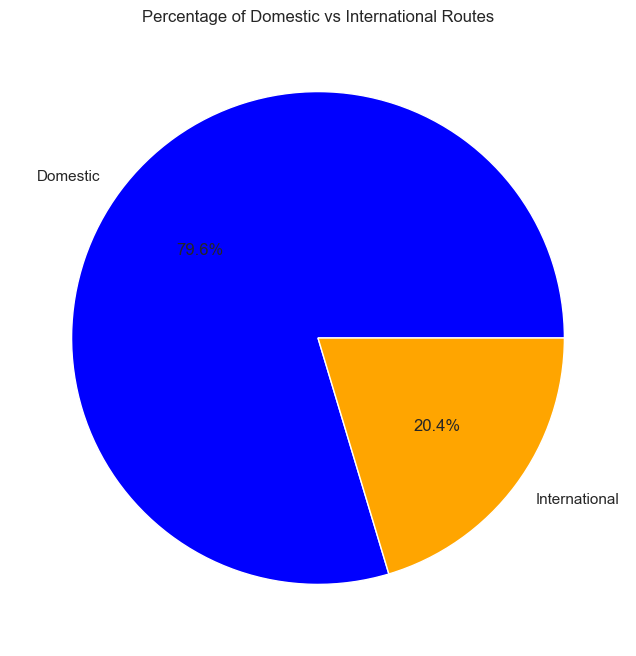

In [53]:
# Pie chart for domestic and international routes
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Percentage of Domestic vs International Routes')
plt.show()

In [54]:
nz_reviews_with_routes_df.to_csv('nz_reviews_with_routes.csv', index=False)
nz_reviews_with_routes_df.columns

Index(['date', 'header', 'rating', 'aircraft', 'type_of_traveller',
       'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'ground_service',
       'wifi_&_connectivity', 'value_for_money', 'recommended',
       'inflight_entertainment', 'verified_status', 'review_content',
       'departure', 'departure_country', 'arrival', 'arrival_country', 'via',
       'is_domestic'],
      dtype='object')

Domestic Flights - Mean Rating: 4.04, Median Rating: 2.00, Std Dev: 3.50
International Flights - Mean Rating: 4.99, Median Rating: 4.00, Std Dev: 3.52


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_86540/2356858288.py:20: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



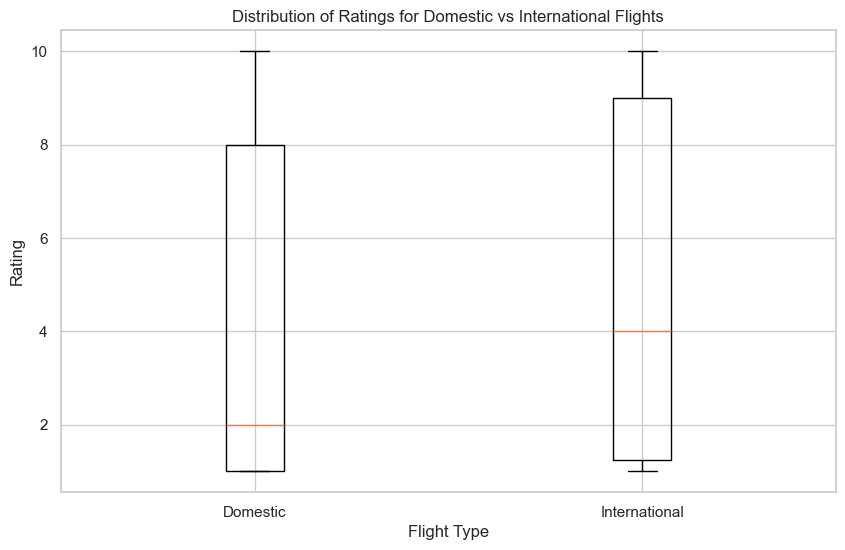

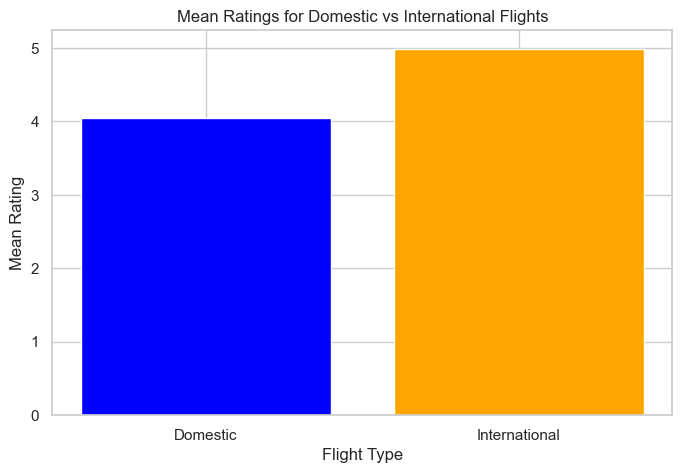

In [55]:
# Separate the dataset into domestic and international flights
domestic_reviews = nz_reviews_with_routes_df[nz_reviews_with_routes_df['is_domestic']]
international_reviews = nz_reviews_with_routes_df[~nz_reviews_with_routes_df['is_domestic']]

# Calculate summary statistics
domestic_mean_rating = domestic_reviews['rating'].mean()
domestic_median_rating = domestic_reviews['rating'].median()
domestic_std_rating = domestic_reviews['rating'].std()

international_mean_rating = international_reviews['rating'].mean()
international_median_rating = international_reviews['rating'].median()
international_std_rating = international_reviews['rating'].std()

# Print summary statistics
print(f"Domestic Flights - Mean Rating: {domestic_mean_rating:.2f}, Median Rating: {domestic_median_rating:.2f}, Std Dev: {domestic_std_rating:.2f}")
print(f"International Flights - Mean Rating: {international_mean_rating:.2f}, Median Rating: {international_median_rating:.2f}, Std Dev: {international_std_rating:.2f}")

# Create a box plot to visualize the distribution of ratings
plt.figure(figsize=(10, 6))
plt.boxplot([domestic_reviews['rating'], international_reviews['rating']], labels=['Domestic', 'International'])
plt.title('Distribution of Ratings for Domestic vs International Flights')
plt.xlabel('Flight Type')
plt.ylabel('Rating')
plt.show()

# Create a bar plot to show mean ratings
mean_ratings = [domestic_mean_rating, international_mean_rating]
plt.figure(figsize=(8, 5))
plt.bar(['Domestic', 'International'], mean_ratings, color=['blue', 'orange'])
plt.title('Mean Ratings for Domestic vs International Flights')
plt.xlabel('Flight Type')
plt.ylabel('Mean Rating')
plt.show()

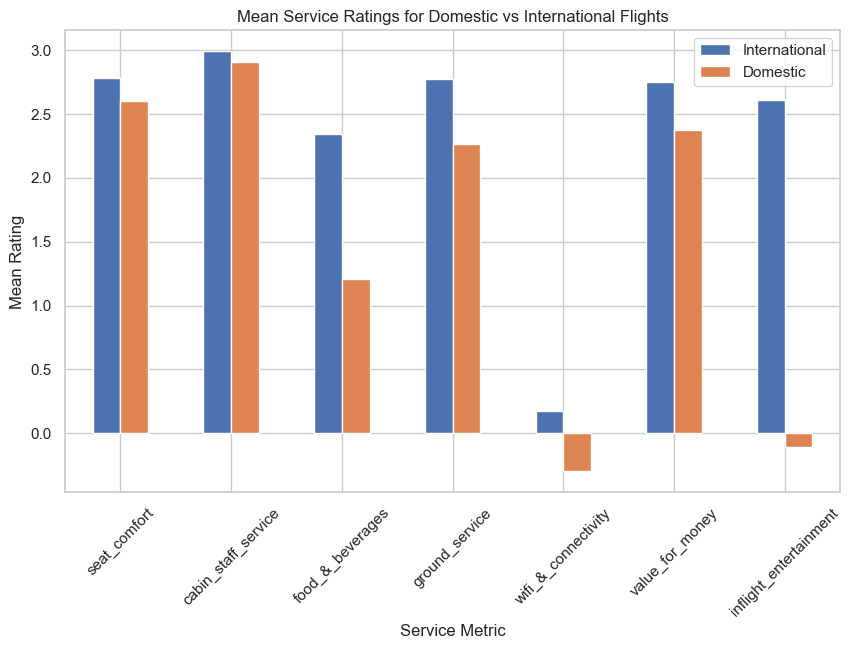

{'seat_comfort': {'t_stat': -0.94564334519521, 'p_value': 0.34562420775806835},
 'cabin_staff_service': {'t_stat': -0.429698840229024,
  'p_value': 0.6679524723088817},
 'food_&_beverages': {'t_stat': -5.096295040838359,
  'p_value': 8.916501139546971e-07},
 'ground_service': {'t_stat': -2.7353572197106706,
  'p_value': 0.006861932493079339},
 'wifi_&_connectivity': {'t_stat': -2.9879329945176156,
  'p_value': 0.003107378240916168},
 'value_for_money': {'t_stat': -2.208243426516251,
  'p_value': 0.028572570047692092},
 'inflight_entertainment': {'t_stat': -15.30935177913301,
  'p_value': 8.146736599761952e-37}}

In [56]:
from scipy import stats

# Service rating columns
service_columns = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages',
                   'ground_service', 'wifi_&_connectivity', 'value_for_money',
                   'inflight_entertainment']

# Calculate mean ratings for each service metric for domestic and international routes
mean_ratings_domestic = nz_reviews_with_routes_df[nz_reviews_with_routes_df['is_domestic']][service_columns].mean()
mean_ratings_international = nz_reviews_with_routes_df[~nz_reviews_with_routes_df['is_domestic']][service_columns].mean()

# Prepare data for visualization
service_metrics = service_columns
mean_ratings = pd.DataFrame({
    'Service Metric': service_metrics,
    'International': mean_ratings_international,
    'Domestic': mean_ratings_domestic
}).set_index('Service Metric')

# Visualize mean ratings using a bar plot
mean_ratings.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Service Ratings for Domestic vs International Flights')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.show()

# Perform independent t-tests for each service metric
ttest_results = {}
for service in service_columns:
    domestic_ratings = nz_reviews_with_routes_df[nz_reviews_with_routes_df['is_domestic']][service].dropna()
    international_ratings = nz_reviews_with_routes_df[~nz_reviews_with_routes_df['is_domestic']][service].dropna()
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(domestic_ratings, international_ratings, equal_var=False)
    ttest_results[service] = {'t_stat': t_stat, 'p_value': p_value}

# Display t-test results
ttest_results


### Key Terms:
- **t-statistic (t_stat)**: A measure of the difference between the sample means in units of standard error. A larger absolute t-statistic indicates a larger difference.
- **p-value**: The probability that the observed difference between the groups occurred by random chance. If the p-value is small (typically less than 0.05), we reject the null hypothesis, which means we conclude that there is a statistically significant difference between the two groups.

### Metric Interpretation:

1. **Seat Comfort**:
   - **t_stat**: -0.95
   - **p_value**: 0.3456
   - **Interpretation**: No significant difference in seat comfort ratings between domestic and international flights (p > 0.05).

2. **Cabin Staff Service**:
   - **t_stat**: -0.43
   - **p_value**: 0.6680
   - **Interpretation**: No significant difference in cabin staff service ratings (p > 0.05).

3. **Food & Beverages**:
   - **t_stat**: -5.10
   - **p_value**: 8.92e-07 (0.00000089)
   - **Interpretation**: Significant difference in food & beverages ratings, with international routes likely having better ratings (p < 0.05).

4. **Ground Service**:
   - **t_stat**: -2.74
   - **p_value**: 0.0069
   - **Interpretation**: Significant difference in ground service ratings, likely favoring international flights (p < 0.05).

5. **Wi-Fi & Connectivity**:
   - **t_stat**: -2.99
   - **p_value**: 0.0031
   - **Interpretation**: Significant difference in Wi-Fi & connectivity, likely favoring international flights (p < 0.05).

6. **Value for Money**:
   - **t_stat**: -2.21
   - **p_value**: 0.0286
   - **Interpretation**: Significant difference in value for money, likely favoring international flights (p < 0.05).

7. **In-flight Entertainment**:
   - **t_stat**: -15.31
   - **p_value**: 8.15e-37 (0.0000000000000000000000000000000000815)
   - **Interpretation**: Very strong significant difference in in-flight entertainment, with international routes likely providing much better services (p < 0.05).

### Summary:
- **No significant differences** for **seat comfort** and **cabin staff service** between domestic and international routes.
- **Significant differences** for **food & beverages**, **ground service**, **Wi-Fi & connectivity**, **value for money**, and **in-flight entertainment**, with international routes likely having better ratings.

In [57]:
reviews_df.columns

Index(['date', 'header', 'rating', 'aircraft', 'type_of_traveller',
       'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'ground_service',
       'wifi_&_connectivity', 'value_for_money', 'recommended',
       'inflight_entertainment', 'verified_status', 'review_content',
       'departure', 'arrival', 'via'],
      dtype='object')